In [1]:
## Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
import pickle as pkl

## Importing utils
from utils import generate_pure_random, generate_constrained_random

## Autoreload
%load_ext autoreload
%autoreload 2

## Imporitng random package
from experiment import Random

## Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

## Purely Random Dataset

(100, 4) (100,)
RFC  :  1.0
LR  :  1.0
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 993, 1: 7})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 996, 1: 4})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,

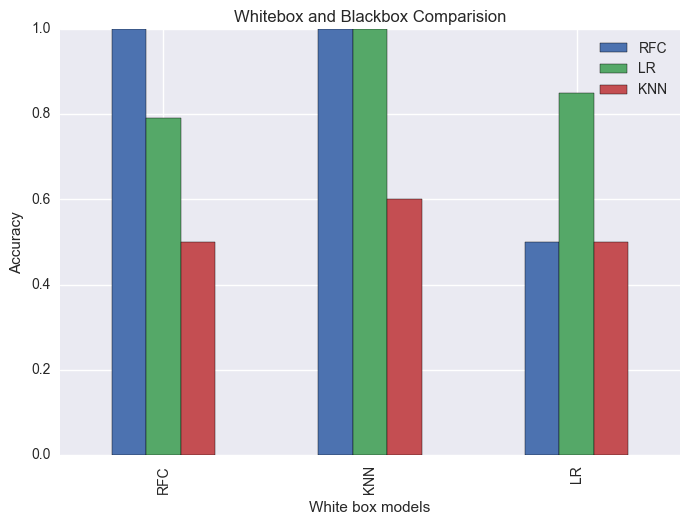

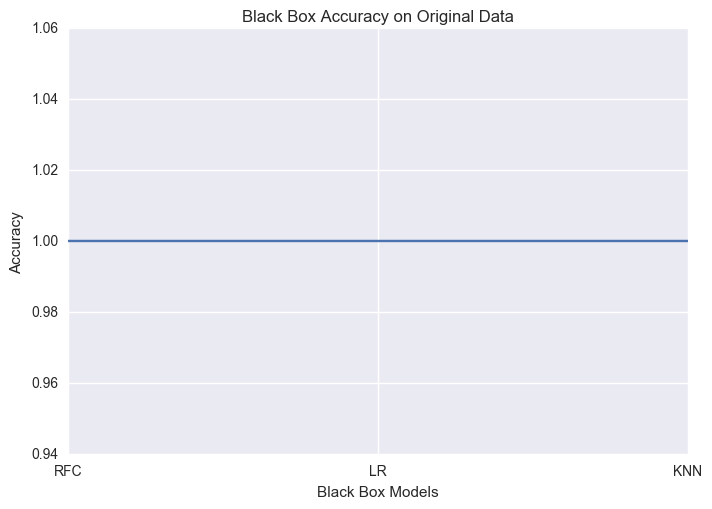

In [5]:
## Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
X = X[(y == 0) | (y == 1), :]
y = y[(y == 0) | (y == 1)]
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)

for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50

random.generate_labels(names)
whitebox = models

## Comparison Plot
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(100, 2) (100,)
RFC  :  1.0
LR  :  0.86
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 576, 1: 424})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 528, 1: 472})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbo

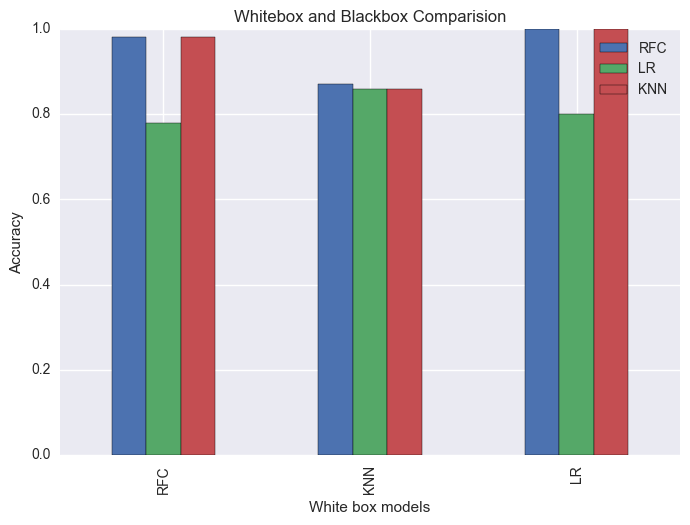

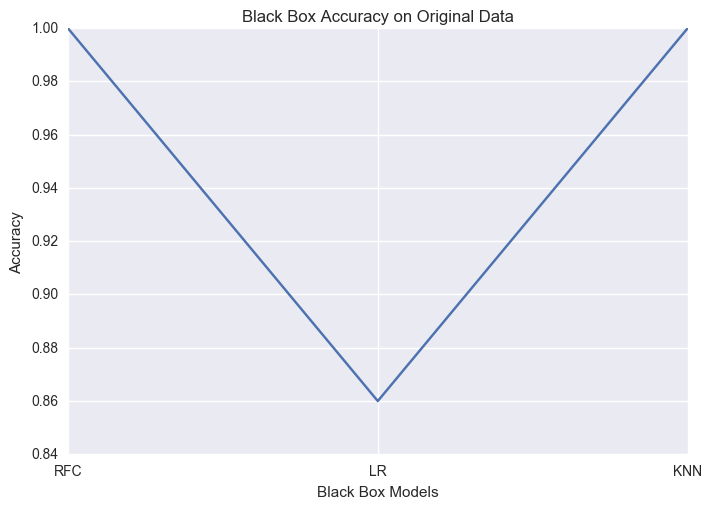

In [6]:
## Make Moons
data = datasets.make_moons()
X, y = data
feature_names = ['feature1', 'feature2']
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)

for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50

random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(569, 30) (569,)
RFC  :  0.998242530756
LR  :  0.959578207381
KNN  :  0.947275922671
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 830, 0: 170})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({1: 1000})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', t

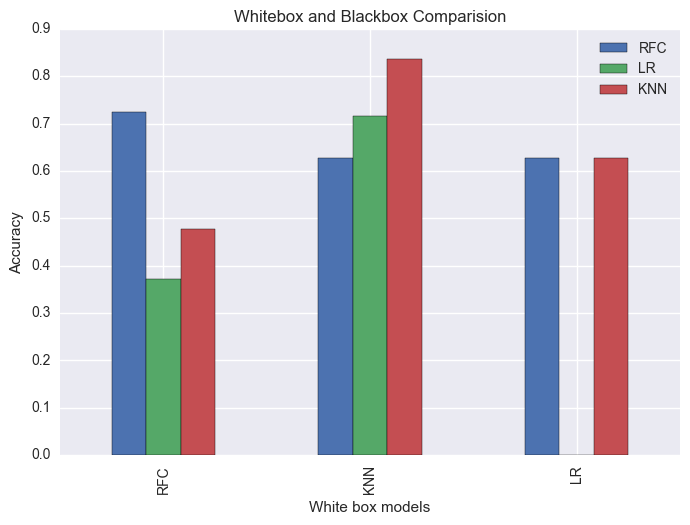

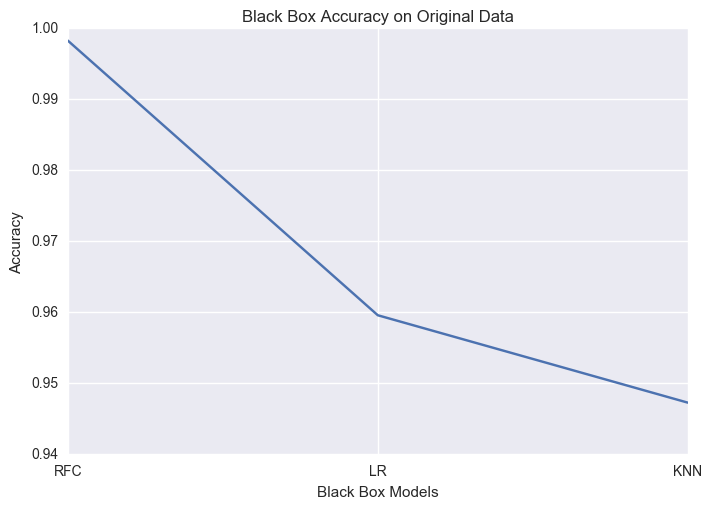

In [7]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(462, 9) (462,)
RFC  :  0.978354978355
LR  :  0.733766233766
KNN  :  0.720779220779
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 1000})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 1000})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.000

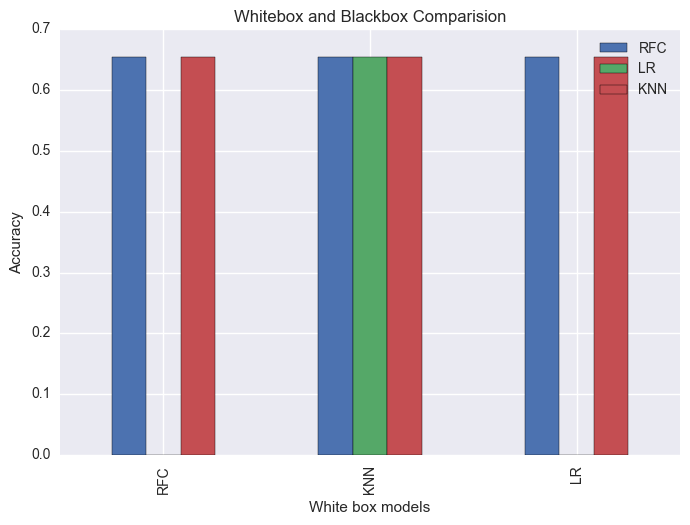

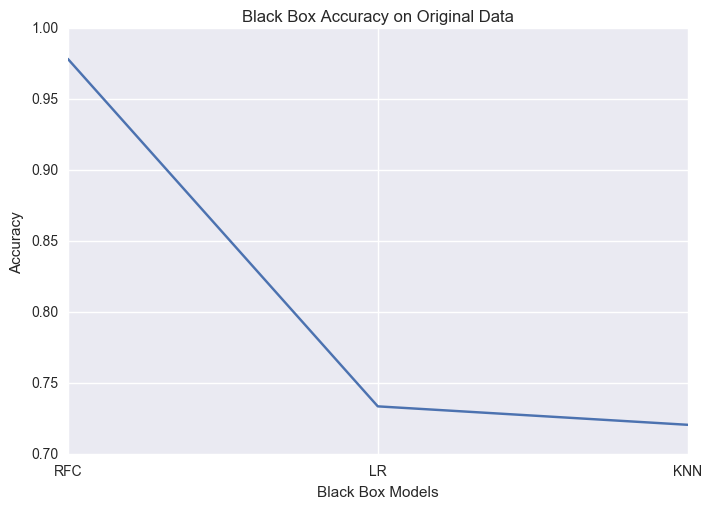

In [8]:
## Heart Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(32561, 107) (32561,)
RFC  :  0.987377537545
LR  :  0.797948465956
KNN  :  0.835785141734
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 996, 1: 4})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 1000})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear'

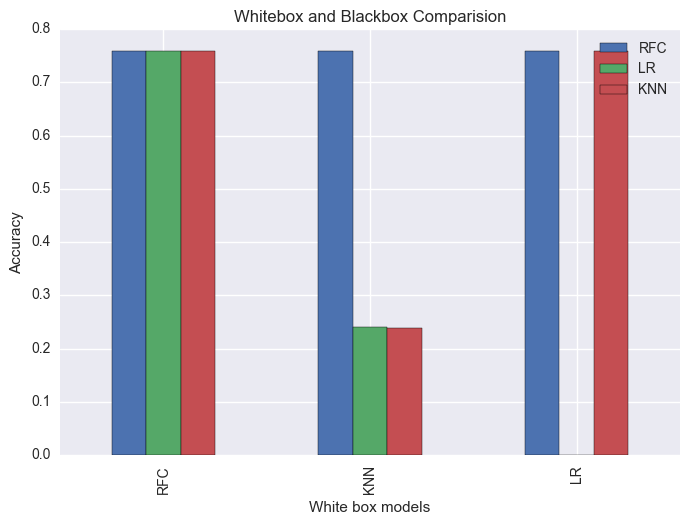

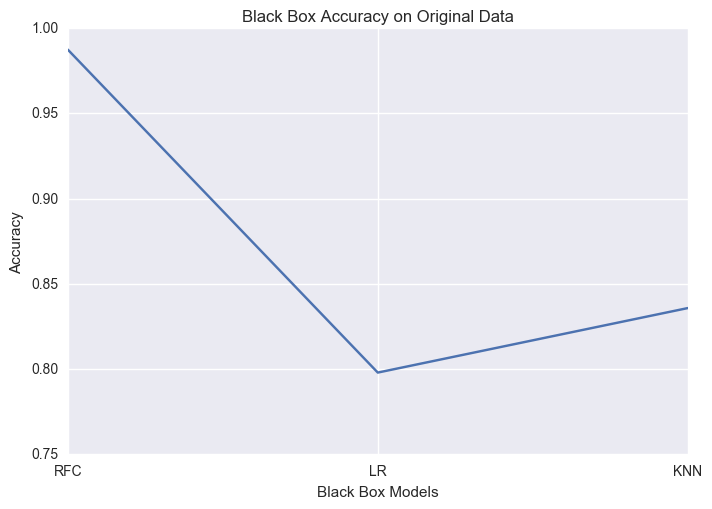

In [9]:
## Census Dataset
with open('../../../Dataset/Census/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Census/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(106, 29) (106,)
RFC  :  0.990566037736
LR  :  0.933962264151
KNN  :  0.924528301887
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 634, 0: 366})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 1000})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', t

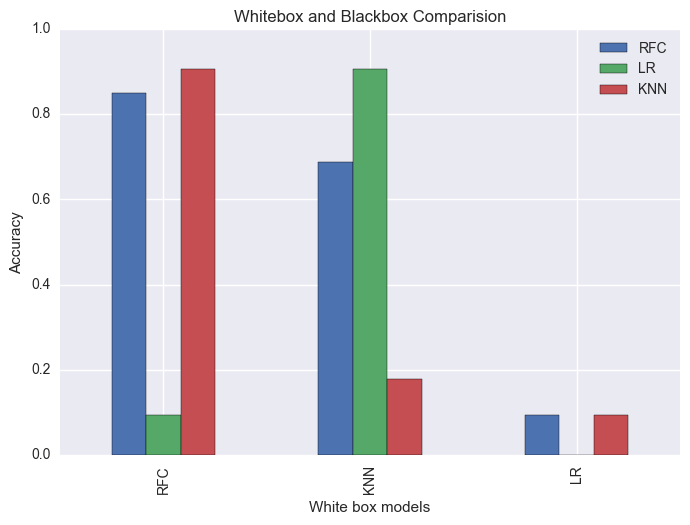

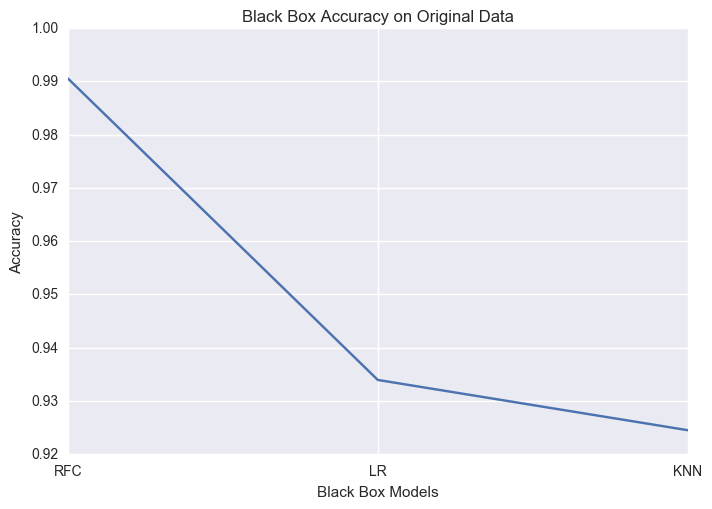

In [14]:
## Bridges Dataset
with open('../../../Dataset/Bridges/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Bridges/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)

for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(8124, 112) (8124,)
RFC  :  1.0
LR  :  1.0
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 565, 1: 435})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 565, 1: 435})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          ve

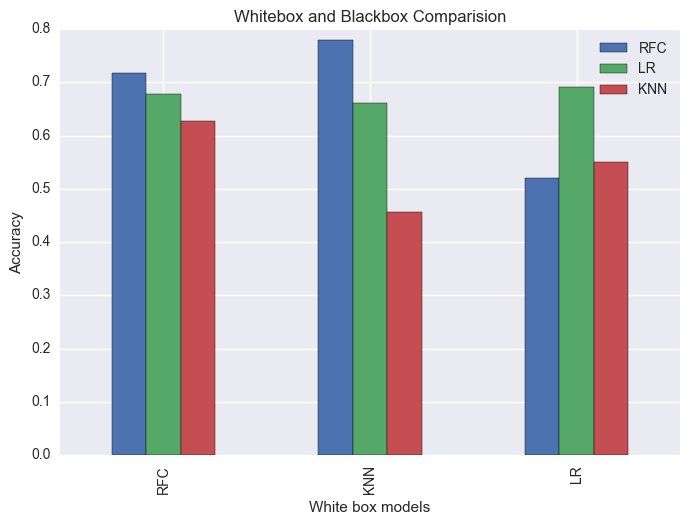

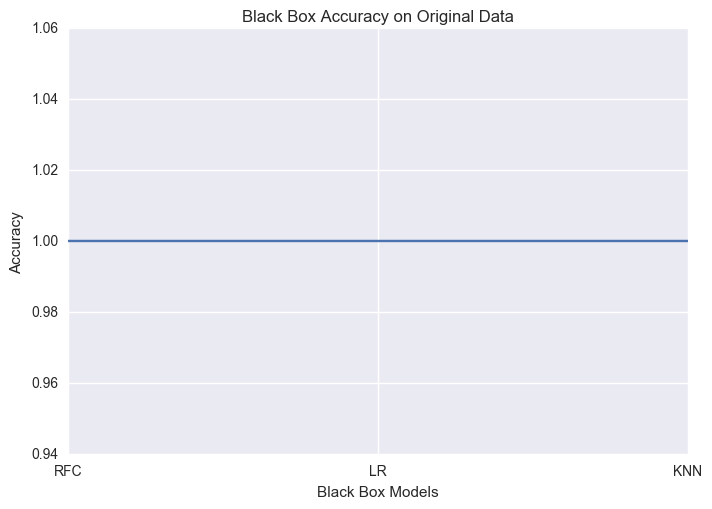

In [15]:
## Bridges Dataset
with open('../../../Dataset/Mushroom/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Mushroom/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

## Random Data with Constraints

(100, 4) (100,)
RFC  :  1.0
LR  :  1.0
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 612, 0: 388})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({1: 608, 0: 392})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbos

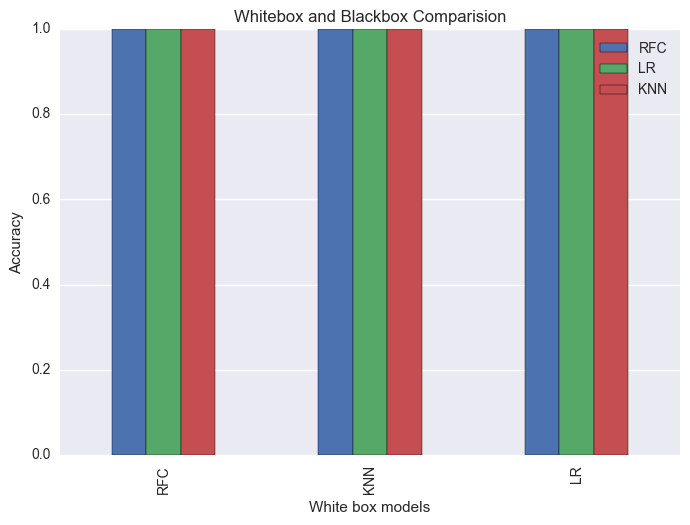

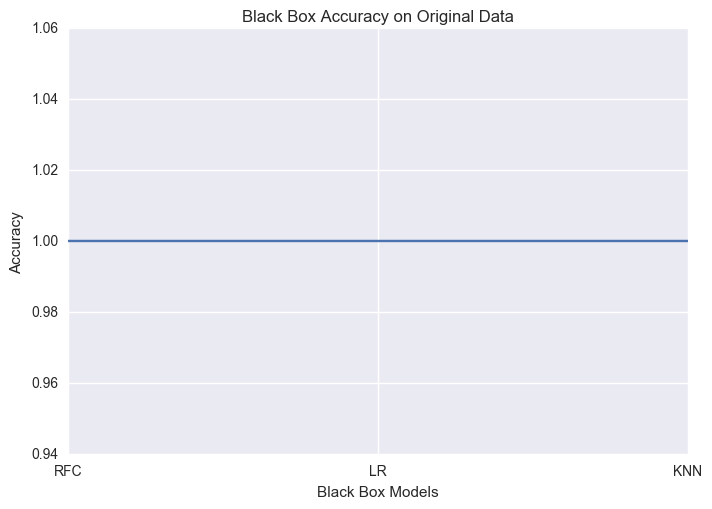

In [16]:
## Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
X = X[(y == 0) | (y == 1), :]
y = y[(y == 0) | (y == 1)]
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(100, 2) (100,)
RFC  :  1.0
LR  :  0.86
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 518, 1: 482})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 518, 1: 482})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbo

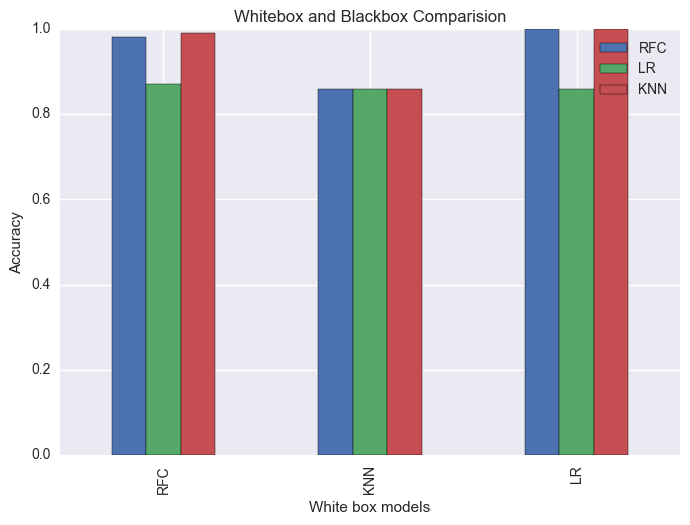

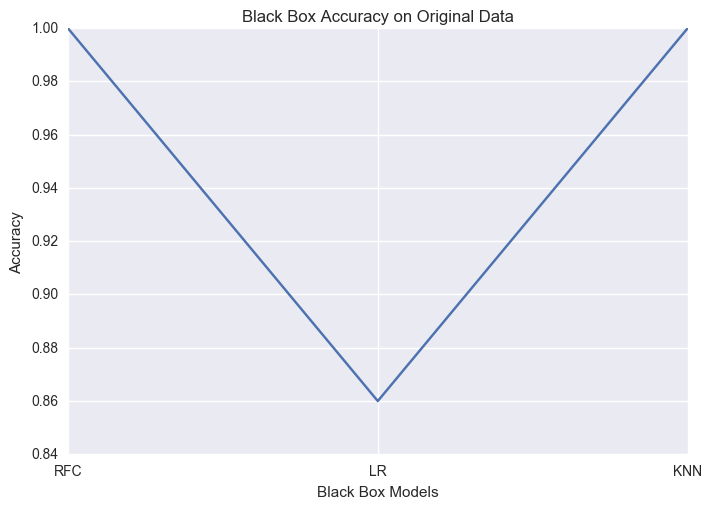

In [17]:
## Make Moons
data = datasets.make_moons()
X, y = data
feature_names = ['feature1', 'feature2']
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(569, 30) (569,)
RFC  :  0.998242530756
LR  :  0.959578207381
KNN  :  0.947275922671
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 961, 1: 39})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 941, 1: 59})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinea

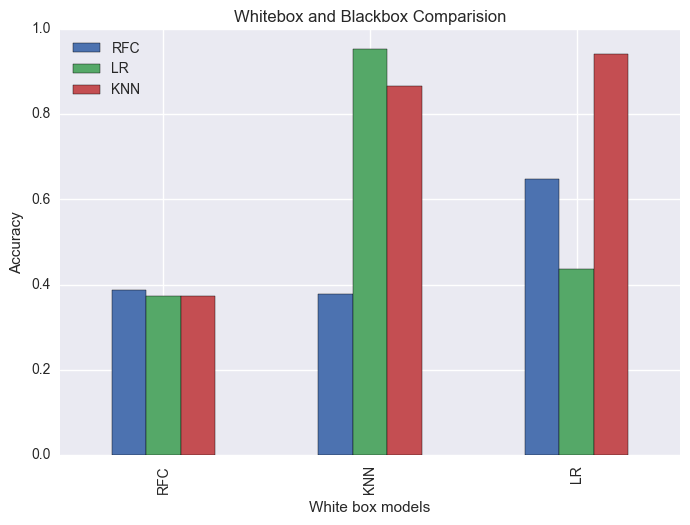

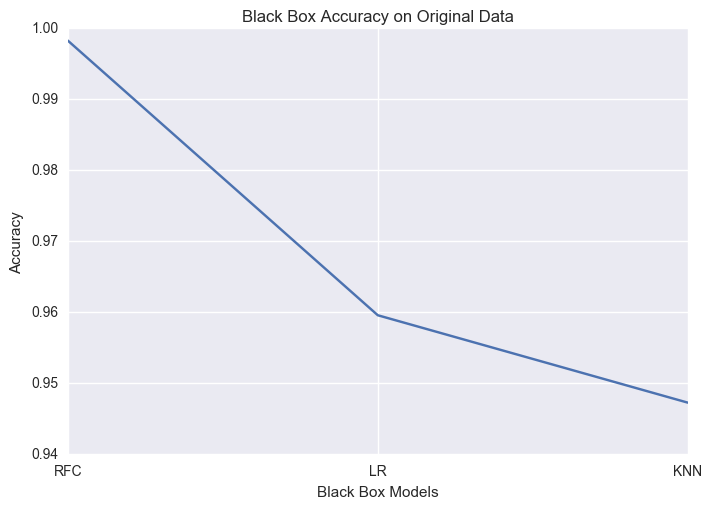

In [18]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(462, 9) (462,)
RFC  :  0.984848484848
LR  :  0.733766233766
KNN  :  0.720779220779
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 520, 1: 480})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 632, 1: 368})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='libline

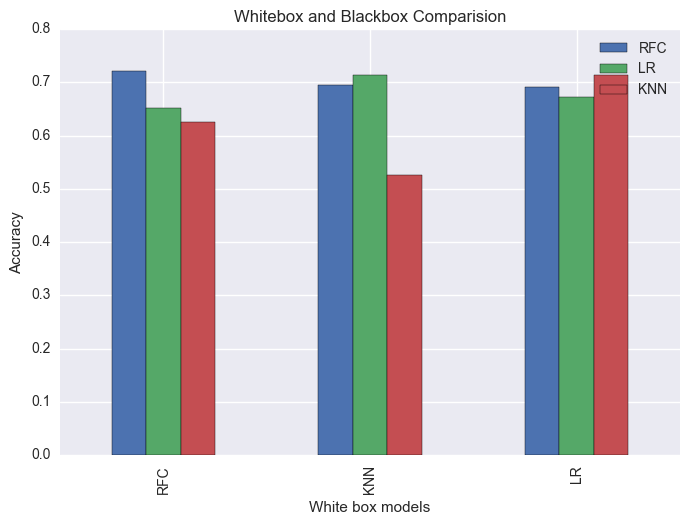

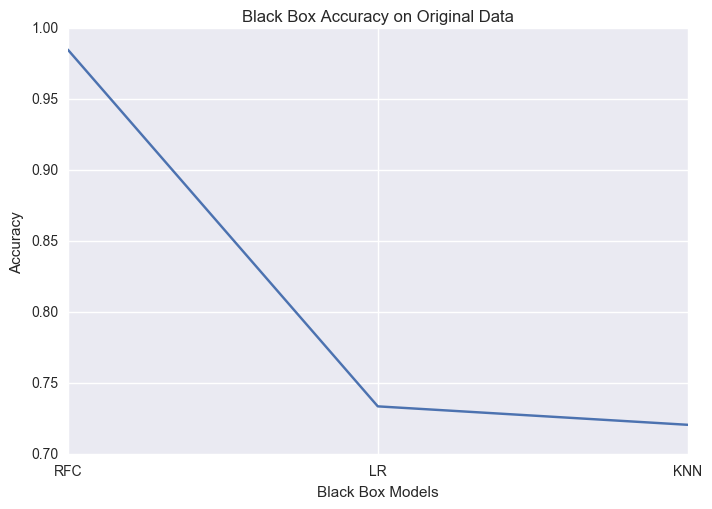

In [19]:
## Heart Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(32561, 107) (32561,)
RFC  :  0.987592518657
LR  :  0.797948465956
KNN  :  0.835785141734
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 703, 0: 297})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 621, 1: 379})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='l

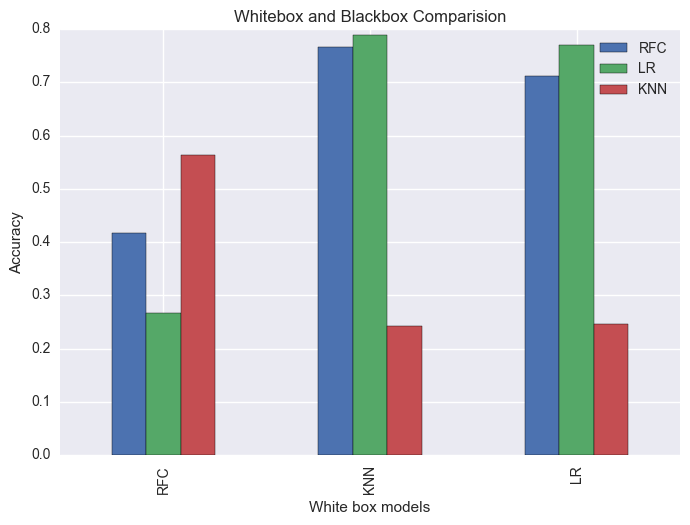

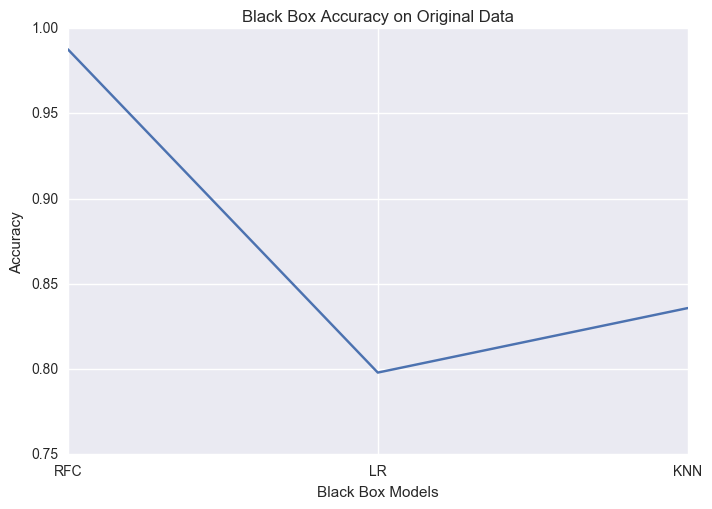

In [20]:
## Adult Census dataset
with open('../../../Dataset/Census/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Census/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50

random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(106, 29) (106,)
RFC  :  0.981132075472
LR  :  0.933962264151
KNN  :  0.924528301887
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 814, 0: 186})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({1: 993, 0: 7})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinea

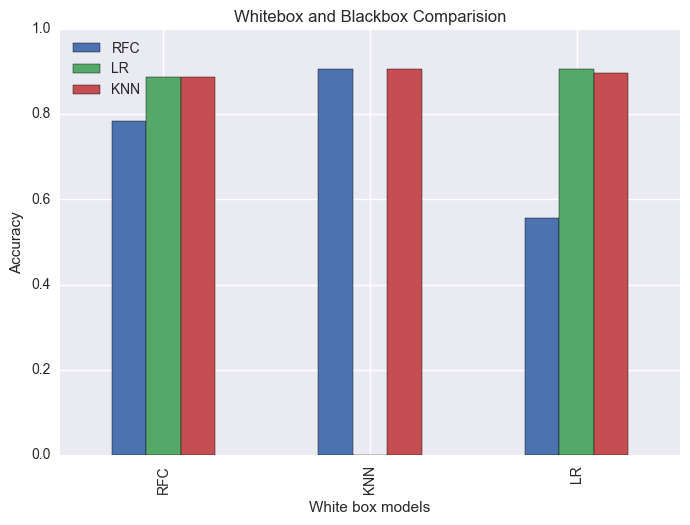

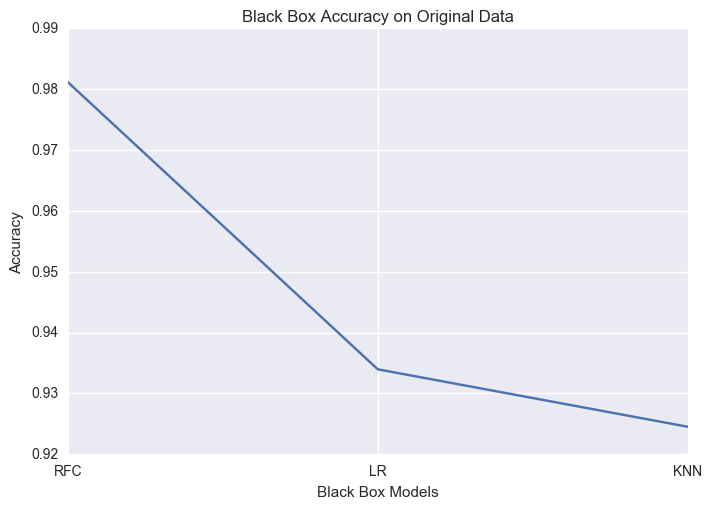

In [21]:
## Bridges Dataset
with open('../../../Dataset/Bridges/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Bridges/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50

random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(8124, 112) (8124,)
RFC  :  1.0
LR  :  1.0
KNN  :  1.0
**************************************************
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 548, 0: 452})
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Distribution:  Counter({0: 580, 1: 420})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          ve

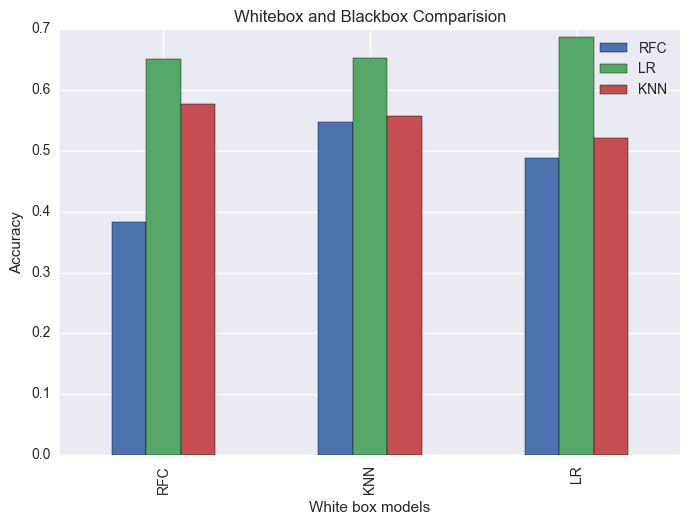

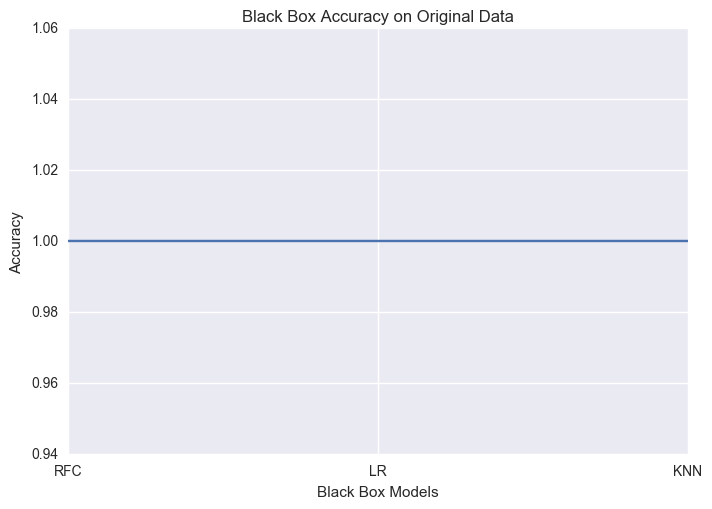

In [22]:
## Mushroom Dataset
with open('../../../Dataset/Mushroom/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Mushroom/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
names = ['RFC', 'LR', 'KNN']
blacbox_acc = random.fit_blackbox_models(models, names)
for i in range(len(names)):
    print names[i], ' : ', blacbox_acc[i]

print "*"*50

random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

## Multivariate Gaussian Distribution

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
## Fit the blackbox on the original data
blackbox = LogisticRegression()
blackbox.fit(X, y)
print blackbox.score(X, y)

0.733766233766


In [12]:
## Generate a noise vector for the mean
mean = np.random.normal(size=[9])
print mean.shape

## Generate a noise matrix for covariance matrix
cov = np.random.normal(size=[9,9])
print cov.shape

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
print X_random.shape

## Check distribution of labels from data generated above
print Counter(blackbox.predict(X_random))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = X_random
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

(9,)
(9, 9)
(1000, 9)
Counter({0: 994, 1: 6})
Distribution after  1  iteration:  Counter({0: 1963, 1: 37})
Distribution after  2  iteration:  Counter({0: 1971, 1: 29})
Distribution after  3  iteration:  Counter({0: 1967, 1: 33})
Distribution after  4  iteration:  Counter({0: 1969, 1: 31})
Distribution after  5  iteration:  Counter({0: 1983, 1: 17})
Distribution after  6  iteration:  Counter({0: 1976, 1: 24})
Distribution after  7  iteration:  Counter({0: 1982, 1: 18})
Distribution after  8  iteration:  Counter({0: 1973, 1: 27})
Distribution after  9  iteration:  Counter({0: 1973, 1: 27})
Distribution after  10  iteration:  Counter({0: 1967, 1: 33})


The distribution does not seem to change after fitting the generated data through multiple iterations of the Gaussian Mixture Model.

In [13]:
## Using 2 distributions for each of the labels
## Generate multivariate normal distribution for two labels
random_1 = np.random.multivariate_normal(np.random.normal(size=[9]), np.random.normal(size=[9,9]), [1000])
random_2 = np.random.multivariate_normal(np.random.normal(size=[9]), np.random.normal(size=[9,9]), [1000])
print random_1.shape
print random_2.shape

## Check distribution of labels from data generated above
print 'First distribution: ', Counter(blackbox.predict(random_1))
print 'Second Distribution: ', Counter(blackbox.predict(random_2))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = np.vstack((random_1, random_2))
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

(1000, 9)
(1000, 9)
First distribution:  Counter({0: 956, 1: 44})
Second Distribution:  Counter({0: 999, 1: 1})
Distribution after  1  iteration:  Counter({0: 1955, 1: 45})
Distribution after  2  iteration:  Counter({0: 1960, 1: 40})
Distribution after  3  iteration:  Counter({0: 1967, 1: 33})
Distribution after  4  iteration:  Counter({0: 1973, 1: 27})
Distribution after  5  iteration:  Counter({0: 1962, 1: 38})
Distribution after  6  iteration:  Counter({0: 1973, 1: 27})
Distribution after  7  iteration:  Counter({0: 1979, 1: 21})
Distribution after  8  iteration:  Counter({0: 1970, 1: 30})
Distribution after  9  iteration:  Counter({0: 1974, 1: 26})
Distribution after  10  iteration:  Counter({0: 1972, 1: 28})


In [14]:
## Using 2 distributions for each of the labels derived from the predictions of the black box

## Generating mean and covariance matrix through random noise
mean = np.random.normal(size=[9])
cov = np.random.normal(size=[9,9])

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
y_predict = blackbox.predict(X_random)

## Generate multivariate normal for first label
data = X_random[y_predict == 0, :]
mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
random_1 = np.random.multivariate_normal(mean_1, cov_1, [1000])

## Generate multivariate normal for second label
data = X_random[y_predict == 1, :]
mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
random_2 = np.random.multivariate_normal(mean_2, cov_2, [1000])

## Check distribution of labels from data generated above
print 'First distribution: ', Counter(blackbox.predict(random_1))
print 'Second Distribution: ', Counter(blackbox.predict(random_2))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = np.vstack((random_1, random_2))
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

First distribution:  Counter({0: 973, 1: 27})
Second Distribution:  Counter({1: 834, 0: 166})
Distribution after  1  iteration:  Counter({0: 1158, 1: 842})
Distribution after  2  iteration:  Counter({0: 1093, 1: 907})
Distribution after  3  iteration:  Counter({0: 1141, 1: 859})
Distribution after  4  iteration:  Counter({0: 1207, 1: 793})
Distribution after  5  iteration:  Counter({0: 1204, 1: 796})
Distribution after  6  iteration:  Counter({0: 1214, 1: 786})
Distribution after  7  iteration:  Counter({0: 1216, 1: 784})
Distribution after  8  iteration:  Counter({0: 1212, 1: 788})
Distribution after  9  iteration:  Counter({0: 1197, 1: 803})
Distribution after  10  iteration:  Counter({0: 1219, 1: 781})


In [8]:
## Just like above but with a little fab!

mean = np.random.normal(size=[9])
cov = np.random.normal(size=[9,9])

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
y_predict = blackbox.predict(X_random)

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
gmm = GaussianMixture(n_components=2)


for i in range(1, 10+1):
    
    ## Generate multivariate normal for first label
    data = X_random[y_predict == 0, :]
    mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
    random_1 = np.random.multivariate_normal(mean_1, cov_1, [1000])

    ## Generate multivariate normal for second label
    data = X_random[y_predict == 1, :]
    mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
    random_2 = np.random.multivariate_normal(mean_2, cov_2, [1000])
    
    ## Fit the GMM using the multivariate distributions for both labels
    data = np.vstack((random_1, random_2))
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    
    X_random = new_data
    y_predict = blackbox.predict(X_random)

Distribution after  1  iteration:  Counter({0: 1111, 1: 889})
Distribution after  2  iteration:  Counter({1: 1014, 0: 986})
Distribution after  3  iteration:  Counter({0: 1020, 1: 980})
Distribution after  4  iteration:  Counter({0: 1057, 1: 943})
Distribution after  5  iteration:  Counter({0: 1005, 1: 995})
Distribution after  6  iteration:  Counter({1: 1004, 0: 996})
Distribution after  7  iteration:  Counter({1: 1011, 0: 989})
Distribution after  8  iteration:  Counter({0: 1031, 1: 969})
Distribution after  9  iteration:  Counter({1: 1027, 0: 973})
Distribution after  10  iteration:  Counter({1: 1016, 0: 984})


This algorithm kinda works but still need to observe how much close the mean of this randomly generated data are to the original data

In [9]:
print np.mean(X_random), np.mean(X)
print np.std(X_random), np.std(X)

-0.057302717287 34.6148388648
1.92429608752 42.2743469741


In [10]:
print X_random.shape
print y_predict.shape

(2000, 9)
(2000,)


In [11]:
whitebox = LogisticRegression()
whitebox.fit(X_random, y_predict)
print whitebox.score(X, y)

0.65367965368


#### Checking on our standardised dataset

In [6]:
## Testing on some other models
def equiRandom(blackbox, num_features, data_size=1000, verbose=True):
    mean = np.random.normal(size=[num_features])
    cov = np.random.normal(size=[num_features,num_features])

    ## Generate multivariate normal distribution using random mean and covariance matrix generated above
    X_random = np.random.multivariate_normal(mean,cov,[data_size])
    y_predict = blackbox.predict(X_random)

    ## Fit a GMM with 2 components and generate samples
    ## Repeat this procedure until the labels are equipartitioned
    gmm = GaussianMixture(n_components=2)


    for i in range(1, 10+1):
    
        ## Generate multivariate normal for first label
        data = X_random[y_predict == 0, :]
        mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
        random_1 = np.random.multivariate_normal(mean_1, cov_1, [data_size/2])

        ## Generate multivariate normal for second label
        data = X_random[y_predict == 1, :]
        mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
        random_2 = np.random.multivariate_normal(mean_2, cov_2, [data_size/2])

        ## Fit the GMM using the multivariate distributions for both labels
        data = np.vstack((random_1, random_2))
        gmm.fit(data)
        new_data,_ = gmm.sample(n_samples=2000)
        if verbose:
            print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))

        X_random = new_data
        y_predict = blackbox.predict(X_random)
    
    return X_random, y_predict

In [4]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
print 'Original Data Characteristics: ', np.mean(X), np.std(X)

acb, acw = [],[]
for i in range(10):
    
    blackbox = LogisticRegression()
    blackbox.fit(X, y)
    score = blackbox.score(X, y)
    acb.append(score)
    print 'Blackbox score: ', score

    X_random, y_random = equiRandom(blackbox, num_features=X.shape[1], verbose=False)

    print 'Characteristics of random data', np.mean(X_random), np.std(X_random)
    whitebox = LogisticRegression()
    whitebox.fit(X_random, y_random)
    score = whitebox.score(X, y)
    acw.append(score)
    print 'Whitebox score: ', score

(569, 30) (569,)
Original Data Characteristics:  61.8907123395 228.297405083
Blackbox score:  0.959578207381
Characteristics of random data -0.142825012988 2.42361924863
Whitebox score:  0.358523725835
Blackbox score:  0.957820738137
Characteristics of random data -0.330462863125 2.31487374508
Whitebox score:  0.404217926186
Blackbox score:  0.959578207381
Characteristics of random data 0.0497721814672 2.333443918
Whitebox score:  0.627416520211
Blackbox score:  0.959578207381
Characteristics of random data -0.217418181298 2.50217451696
Whitebox score:  0.652021089631
Blackbox score:  0.959578207381
Characteristics of random data -0.478328052558 2.27959731275
Whitebox score:  0.372583479789
Blackbox score:  0.959578207381
Characteristics of random data 0.0636064359171 2.22304541079
Whitebox score:  0.372583479789
Blackbox score:  0.959578207381
Characteristics of random data -0.169428109716 2.55614319098
Whitebox score:  0.372583479789
Blackbox score:  0.959578207381
Characteristics of

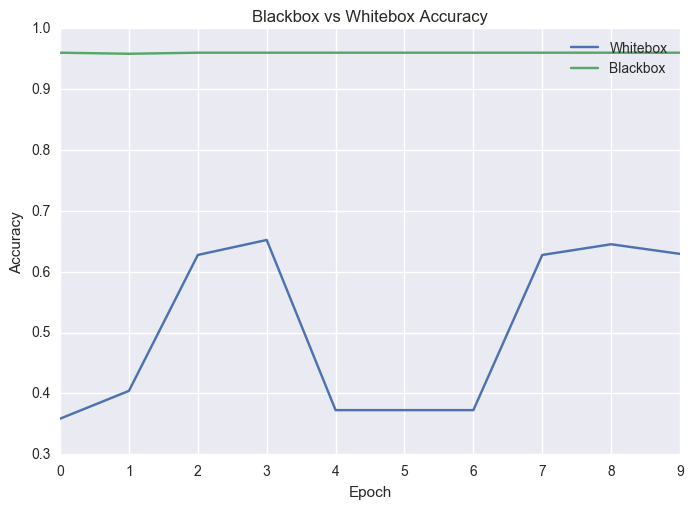

In [5]:
plt.plot(acw, label='Whitebox')
plt.plot(acb, label='Blackbox')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Blackbox vs Whitebox Accuracy')
plt.show()

In [7]:
## Heart Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
print 'Original Data Characteristics: ', np.mean(X), np.std(X)

acb, acw = [],[]
for i in range(10):
    
    blackbox = LogisticRegression()
    blackbox.fit(X, y)
    score = blackbox.score(X, y)
    acb.append(score)
    print 'Blackbox score: ', score

    X_random, y_random = equiRandom(blackbox, num_features=X.shape[1], verbose=False)

    print 'Characteristics of random data', np.mean(X_random), np.std(X_random)
    whitebox = LogisticRegression()
    whitebox.fit(X_random, y_random)
    score = whitebox.score(X, y)
    acw.append(score)
    print 'Whitebox score: ', score

(462, 9) (462,)
Original Data Characteristics:  34.6148388648 42.2743469741
Blackbox score:  0.733766233766
Characteristics of random data -0.0256419702032 1.7837583908
Whitebox score:  0.34632034632
Blackbox score:  0.733766233766
Characteristics of random data -0.241888123222 1.93148839143
Whitebox score:  0.402597402597
Blackbox score:  0.733766233766
Characteristics of random data 0.269033037652 1.92742378235
Whitebox score:  0.651515151515
Blackbox score:  0.733766233766
Characteristics of random data 0.14358579537 2.09492932474
Whitebox score:  0.348484848485
Blackbox score:  0.733766233766
Characteristics of random data -0.107495597123 1.99240700005
Whitebox score:  0.65367965368
Blackbox score:  0.733766233766
Characteristics of random data 0.496798336826 1.78609143274
Whitebox score:  0.65367965368
Blackbox score:  0.733766233766
Characteristics of random data -0.421986439543 2.32246452917
Whitebox score:  0.640692640693
Blackbox score:  0.733766233766
Characteristics of rando

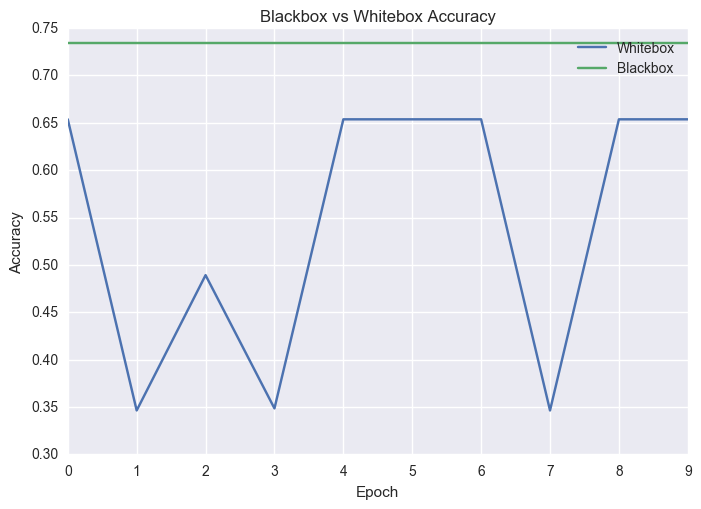

In [7]:
plt.plot(acw, label='Whitebox')
plt.plot(acb, label='Blackbox')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Blackbox vs Whitebox Accuracy')
plt.show()

In [8]:
## Halloween Dataset
data = pd.read_csv('../../../Dataset/Halloween/train.csv')
data = data[(data['type'] == 'Ghoul') | (data['type'] == 'Ghost')]
data['type'] = data['type'].map({"Ghoul":0, "Ghost":1})
mapping = {v:k for k,v in dict(enumerate(np.unique(data['color']))).iteritems()}
data['color'] = data['color'].map(mapping)
y = data.pop('type').values
X = data.values
feature_names = data.columns
print X.shape, y.shape
print 'Original Data Characteristics: ', np.mean(X), np.std(X)

acb, acw = [],[]
for i in range(10):
    
    blackbox = LogisticRegression()
    blackbox.fit(X, y)
    score = blackbox.score(X, y)
    acb.append(score)
    print 'Blackbox score: ', score

    X_random, y_random = equiRandom(blackbox, num_features=X.shape[1], verbose=False)

    print 'Characteristics of random data', np.mean(X_random), np.std(X_random)
    whitebox = LogisticRegression()
    whitebox.fit(X_random, y_random)
    score = whitebox.score(X, y)
    acw.append(score)
    print 'Whitebox score: ', score

(246, 6) (246,)
Original Data Characteristics:  76.0565010544 199.312178777
Blackbox score:  0.951219512195
Characteristics of random data 0.796463116099 1.83767172655
Whitebox score:  0.524390243902
Blackbox score:  0.951219512195
Characteristics of random data 0.265988813219 1.81577242131
Whitebox score:  0.49593495935
Blackbox score:  0.951219512195
Characteristics of random data -0.361718866788 1.52431986793
Whitebox score:  0.524390243902
Blackbox score:  0.951219512195
Characteristics of random data 0.129130335581 1.47133059667
Whitebox score:  0.524390243902
Blackbox score:  0.951219512195
Characteristics of random data -0.062849223033 1.77571207107
Whitebox score:  0.487804878049
Blackbox score:  0.951219512195
Characteristics of random data -0.00905494023254 1.93393321782
Whitebox score:  0.508130081301
Blackbox score:  0.951219512195
Characteristics of random data 0.0600804391345 1.59261916604
Whitebox score:  0.528455284553
Blackbox score:  0.951219512195
Characteristics of 

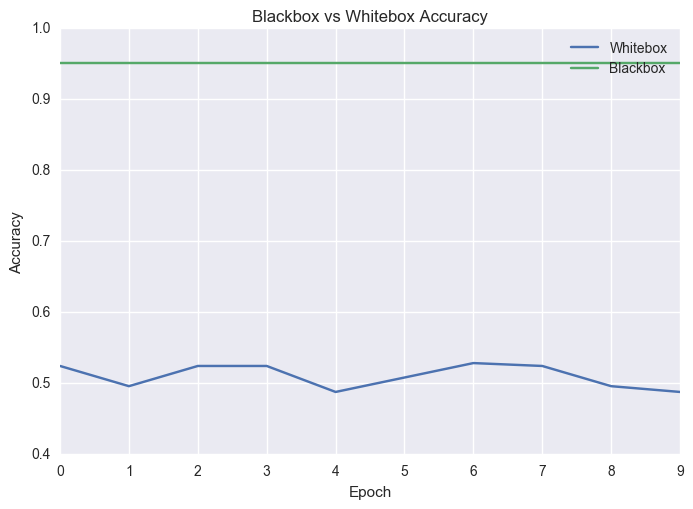

In [9]:
plt.plot(acw, label='Whitebox')
plt.plot(acb, label='Blackbox')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Blackbox vs Whitebox Accuracy')
plt.show()

In [11]:
## BUPA DATASET
data = pd.read_csv('../data/bupa.data.txt', names=['feature{}'.format(i) for i in range(1,8)])
labels = pd.read_csv('../data/bupa.ascii.txt', names=['labels'])
labels['labels'] = labels['labels'].map({-1:0, 1:1})
X = data.values
y = labels['labels'].values
feature_names = data.columns
print X.shape, y.shape
print 'Original Data Characteristics: ', np.mean(X), np.std(X)

acb, acw = [],[]
for i in range(10):
    
    blackbox = LogisticRegression()
    blackbox.fit(X, y)
    score = blackbox.score(X, y)
    acb.append(score)
    print 'Blackbox score: ', score

    X_random, y_random = equiRandom(blackbox, num_features=X.shape[1], verbose=False)

    print 'Characteristics of random data', np.mean(X_random), np.std(X_random)
    whitebox = LogisticRegression()
    whitebox.fit(X_random, y_random)
    score = whitebox.score(X, y)
    acw.append(score)
    print 'Whitebox score: ', score

(345, 7) (345,)
Original Data Characteristics:  36.9138716356 35.5925009275
Blackbox score:  0.585507246377
Characteristics of random data -0.048740393911 1.95397994684
Whitebox score:  0.515942028986
Blackbox score:  0.585507246377
Characteristics of random data -0.254270350015 1.60930675201
Whitebox score:  0.420289855072
Blackbox score:  0.585507246377
Characteristics of random data -0.416018145917 1.68935739427
Whitebox score:  0.579710144928
Blackbox score:  0.585507246377
Characteristics of random data -0.281072439548 1.7901745727
Whitebox score:  0.420289855072
Blackbox score:  0.585507246377
Characteristics of random data -0.338519198522 1.68076784234
Whitebox score:  0.455072463768
Blackbox score:  0.585507246377
Characteristics of random data -0.487601418837 1.7164673467
Whitebox score:  0.585507246377
Blackbox score:  0.585507246377
Characteristics of random data -0.543440351833 1.81053607363
Whitebox score:  0.579710144928
Blackbox score:  0.585507246377
Characteristics of 

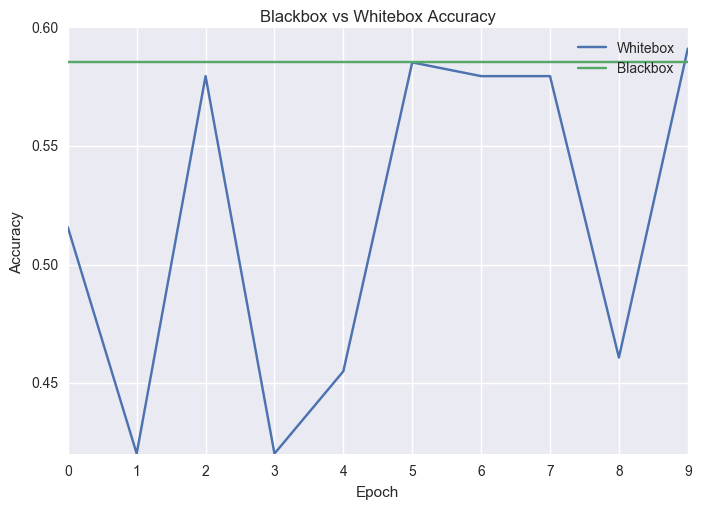

In [12]:
plt.plot(acw, label='Whitebox')
plt.plot(acb, label='Blackbox')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Blackbox vs Whitebox Accuracy')
plt.show()

## Optimization through meta-heuristics

In [16]:
def generate_random_under_range(feature_range, data_size=1000):
    '''
    Input: Data, Feature Names, Size of Random Data
    Output: Random Data
    
    Generates random dataset of size data_size
    Random dataset is generated from normal
    distribution with specified high and low values
    '''
    
    df = {}
    feature_names = ['feature{}'.format(i) for i in range(len(feature_range)/2)]
    k = 0
    for i in range(0, len(feature_range), 2):
        low = feature_range[i]
        high = feature_range[i+1]
        df[feature_names[k]] = np.random.uniform(low=low, high=high, size=data_size)
        k += 1
    random_dataset = pd.DataFrame(data=df, columns=feature_names)
    
    return random_dataset.values

In [17]:
def optimisation_function(feature_mean, label0=0, label1=1, data_size=1000):
    num_features = len(feature_mean)
    cov = np.random.rand(num_features, num_features)
    cov = np.dot(cov, cov.transpose())
    X_random = np.random.multivariate_normal(mean=feature_mean, cov=cov, size=data_size)
    y_random = blackbox.predict(X_random)
    epsilon = 1e-10
    num = np.float(len(y_random[np.equal(y_random, label0)]))
    denom = np.float(len(y_random[np.equal(y_random, label1)]))
    return np.abs(np.log(num/(denom + epsilon)))

In [18]:
def optimisation_function_new(feature_range, label0=0, label1=1, data_size=1000):
    X_random = generate_random_under_range(feature_range, data_size=data_size)
    y_random = blackbox.predict(X_random)
    epsilon = 1e-10
    num = np.float(len(y_random[np.equal(y_random, label0)]))
    denom = np.float(len(y_random[np.equal(y_random, label1)]))
    return np.abs(np.log(num/(denom + epsilon)))

In [19]:
from scipy.optimize import minimize

In [20]:
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
print X.shape, y.shape

(462, 9) (462,)


In [21]:
blackbox = LogisticRegression()
blackbox.fit(X, y)
print blackbox.score(X, y)

0.733766233766


#### mean and covariance with multivariate gaussian

In [22]:
num_features = X.shape[1]
feature_mean = np.random.rand(num_features)

## Sanity Check
print 'Initial value: ', optimisation_function(feature_mean, 0, 1)

## Applying minimisation
res = minimize(optimisation_function, feature_mean, method='BFGS',options={'xtol': 1e-8, 'disp': True})

## Value of function after optimisation
print 'Value of function after minimisation: ', optimisation_function(res.x)

Initial value:  2.35082776194
Divide-by-zero encountered: rhok assumed large
         Current function value: 1.265666
         Iterations: 3
         Function evaluations: 478
         Gradient evaluations: 42
Value of function after minimisation:  1.66568745775


#### with range and univariate normal distribution for each feature

##### The optimisation package requires a function that needs to be optimised and initial value of function in the form of vector.
##### Algorithm for optimisation of data generated under a range specified for each feature
1. low = random vector for each feature
2. high = low + 10*random vector for each feature
3. Generate a vector such that i'th index has low value for feature i and i+1 has high value for corresponding feature
4. optimisation function :
    5. Generate random dataset using vector containing ranges
    6. Produce labels for the dataset using black box
    7. Calculate abs(log(number of zero datapoints/ number of one datapoints))
    8. Return
9. Call scipy.optimize.minimize(optimisation fucntion, vector with ranges, method=['BFGS/Neldor Mead']) and store new found range vector.
10. Find value of optimisation function for new found range vector.
11. EXIT

In [26]:
## Generating feature range vector
low = np.random.rand(num_features)
high = low + 10*np.random.rand(num_features)
feature_range = []
for i in range(len(low)):
    feature_range += [low[i], high[i]]

## Initial value of optimisation function
print 'Initial value: ', optimisation_function_new(feature_range)

## Applying the optimisation function
res = minimize(optimisation_function_new, feature_range, method='BFGS',options={'xtol': 1e-8, 'disp': True})

## Final value of function after optimisation
print 'Value after optimisation: ', optimisation_function_new(res.x)

## Checking distribution
X_random = generate_random_under_range(res.x)
y_random = blackbox.predict(X_random)
print Counter(y_random)

Initial value:  1.00479353345
         Current function value: 0.866419
         Iterations: 1
         Function evaluations: 392
         Gradient evaluations: 19
Value after optimisation:  1.1039527553
Counter({0: 721, 1: 279})
